In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from my_functions import centrality


df_subject_info = pd.read_csv('Archivos\subject-info.csv')[['Subject', 'Count quality']]

In [ ]:
# Guarda las medidas de centralidad de los sujetos (antes y despues) en archivos

df_before = pd.DataFrame()
df_during = pd.DataFrame()

for i in range(0, 35 + 1):
    subject = f'Subject{i:02}'
    csv_path1 = f'Archivos\\{subject}\\csv\\{subject}_1.csv'
    csv_path2 = f'Archivos\\{subject}\\csv\\{subject}_2.csv'

    df_temp1 = pd.DataFrame({'subject': [subject]*19})
    df_temp1 = pd.concat([df_temp1, centrality(csv_path1)], axis=1)
    df_temp1['count_quality'] = ('G' if df_subject_info["Count quality"][i] == 1 else 'B')
    df_before = pd.concat([df_before, df_temp1], ignore_index=True)

    df_temp2 = pd.DataFrame({'subject': [subject]*19})
    df_temp2 = pd.concat([df_temp2, centrality(csv_path2)], axis=1)
    df_temp2['count_quality'] = ('G' if df_subject_info["Count quality"][i] == 1 else 'B')
    df_during = pd.concat([df_during, df_temp2], ignore_index=True)

df_before.to_csv('Archivos\centrality_before.csv', sep=';', index=False)
df_during.to_csv('Archivos\centrality_during.csv', sep=';', index=False)

In [2]:
df_before = pd.read_csv('Archivos\centrality_before.csv', delimiter=';')
df_before['state'] = 'before'

df_during = pd.read_csv('Archivos\centrality_during.csv', delimiter=';')
df_during['state'] = 'during'

df_result = pd.concat([df_before, df_during], ignore_index=True)
df_result

,subject,nodes,degree,betweenness,closeness,pagerank,count_quality,state
0,Subject00,Fp1,0.222222,0.542484,0.250000,0.091498,B,before
1,Subject00,Fp2,0.111111,0.111111,0.206897,0.052705,B,before
2,Subject00,F3,0.111111,0.209150,0.211765,0.048032,B,before
3,Subject00,F4,0.111111,0.522876,0.281250,0.047958,B,before
4,Subject00,F7,0.055556,0.000000,0.202247,0.039825,B,before
...,...,...,...,...,...,...,...,...
1363,Subject35,O1,0.111111,0.366013,0.240000,0.047845,G,during
1364,Subject35,O2,0.111111,0.294118,0.209302,0.046606,G,during
1365,Subject35,Fz,0.222222,0.398693,0.240000,0.094454,G,during
1366,Subject35,Cz,0.111111,0.529412,0.300000,0.040158,G,during


In [3]:
# Función para graficar todas las métricas dado un sensor

def boxplots(sensor: str) -> None:
    df_sensor = df_result[df_result['nodes'] == sensor]
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(13, 11))

    fig.suptitle(f'{sensor} centrality measures')

    ax1.set_title(f'{sensor} boxplot for degree centrality')
    sns.boxplot(
        df_sensor, x='state', y='degree', hue='count_quality', ax=ax1
    )

    ax2.set_title(f'{sensor} boxplot for betweenness centrality')
    sns.boxplot(
        df_sensor, x='state', y='betweenness', hue='count_quality', ax=ax2
    )

    ax3.set_title(f'{sensor} boxplot for closeness centrality')
    sns.boxplot(
        df_sensor, x='state', y='closeness', hue='count_quality', ax=ax3
    )

    ax4.set_title(f'{sensor} boxplot for pagerank')
    sns.boxplot(
        df_sensor, x='state', y='pagerank', hue='count_quality', ax=ax4
    )

    plt.tight_layout()
    plt.show()

## Prefrontal (Fp)

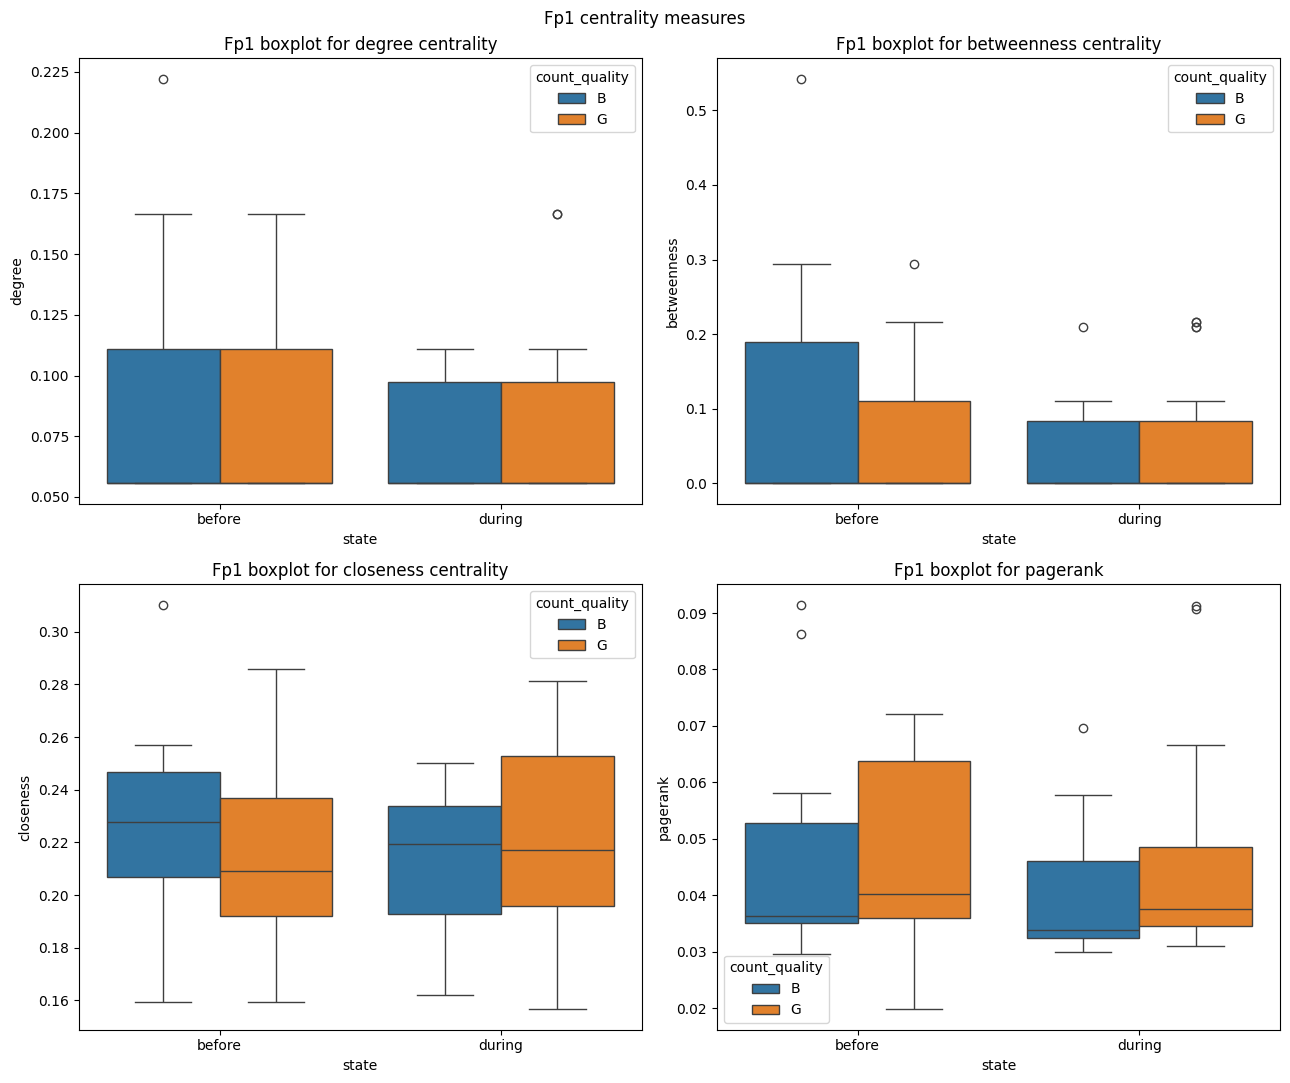

In [4]:
# Todas las gráficas de Fp1 para cada métrica diferente
boxplots('Fp1')

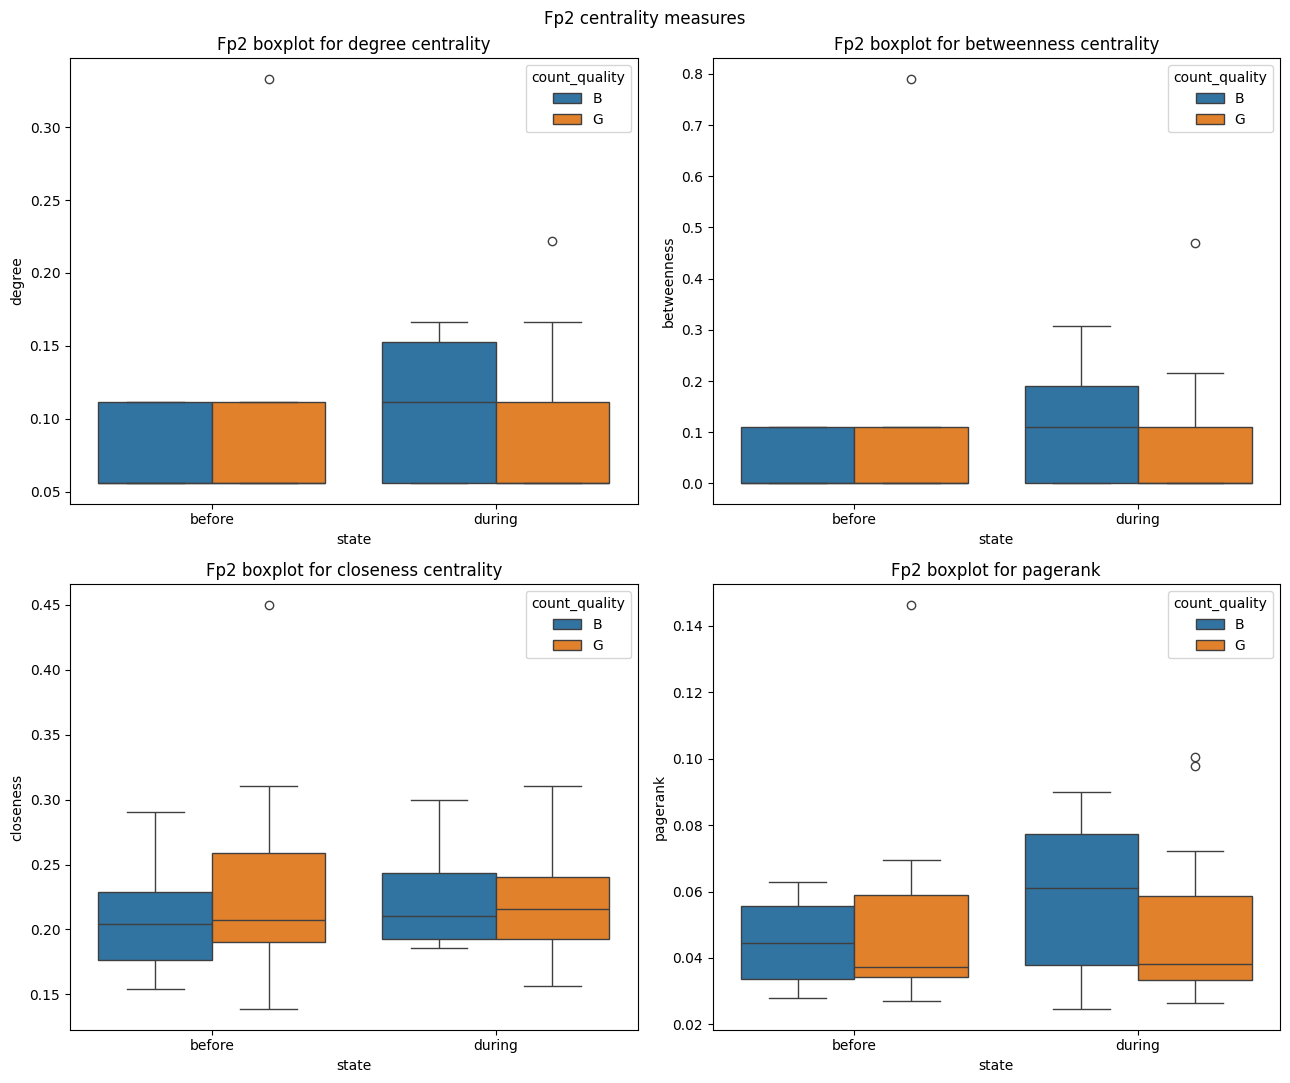

In [5]:
boxplots('Fp2')

## Frontal (F)

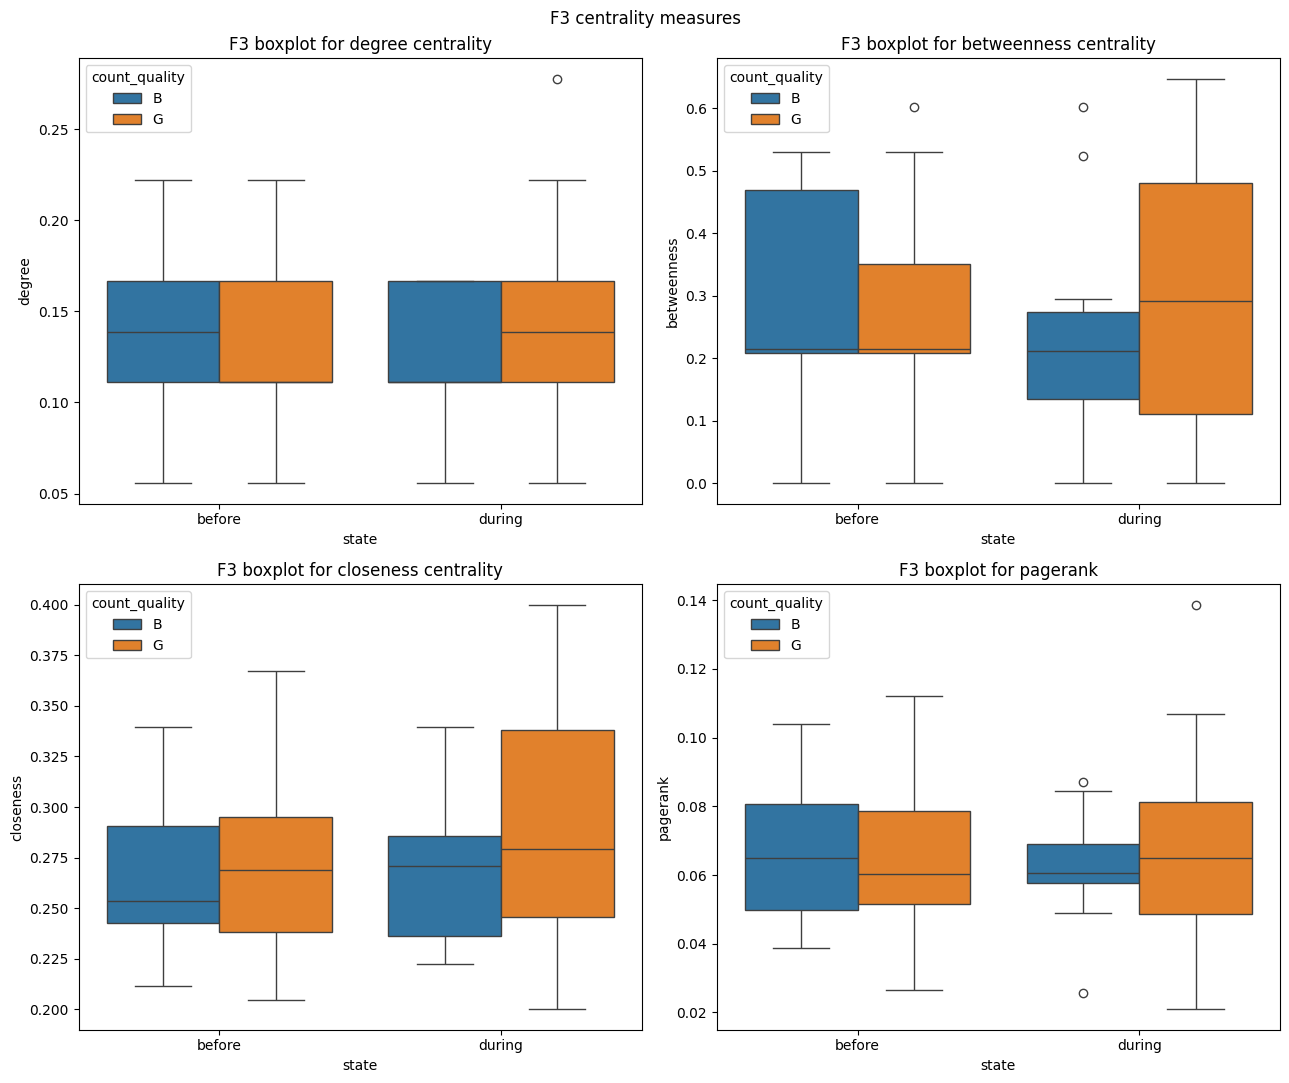

In [6]:
boxplots('F3')

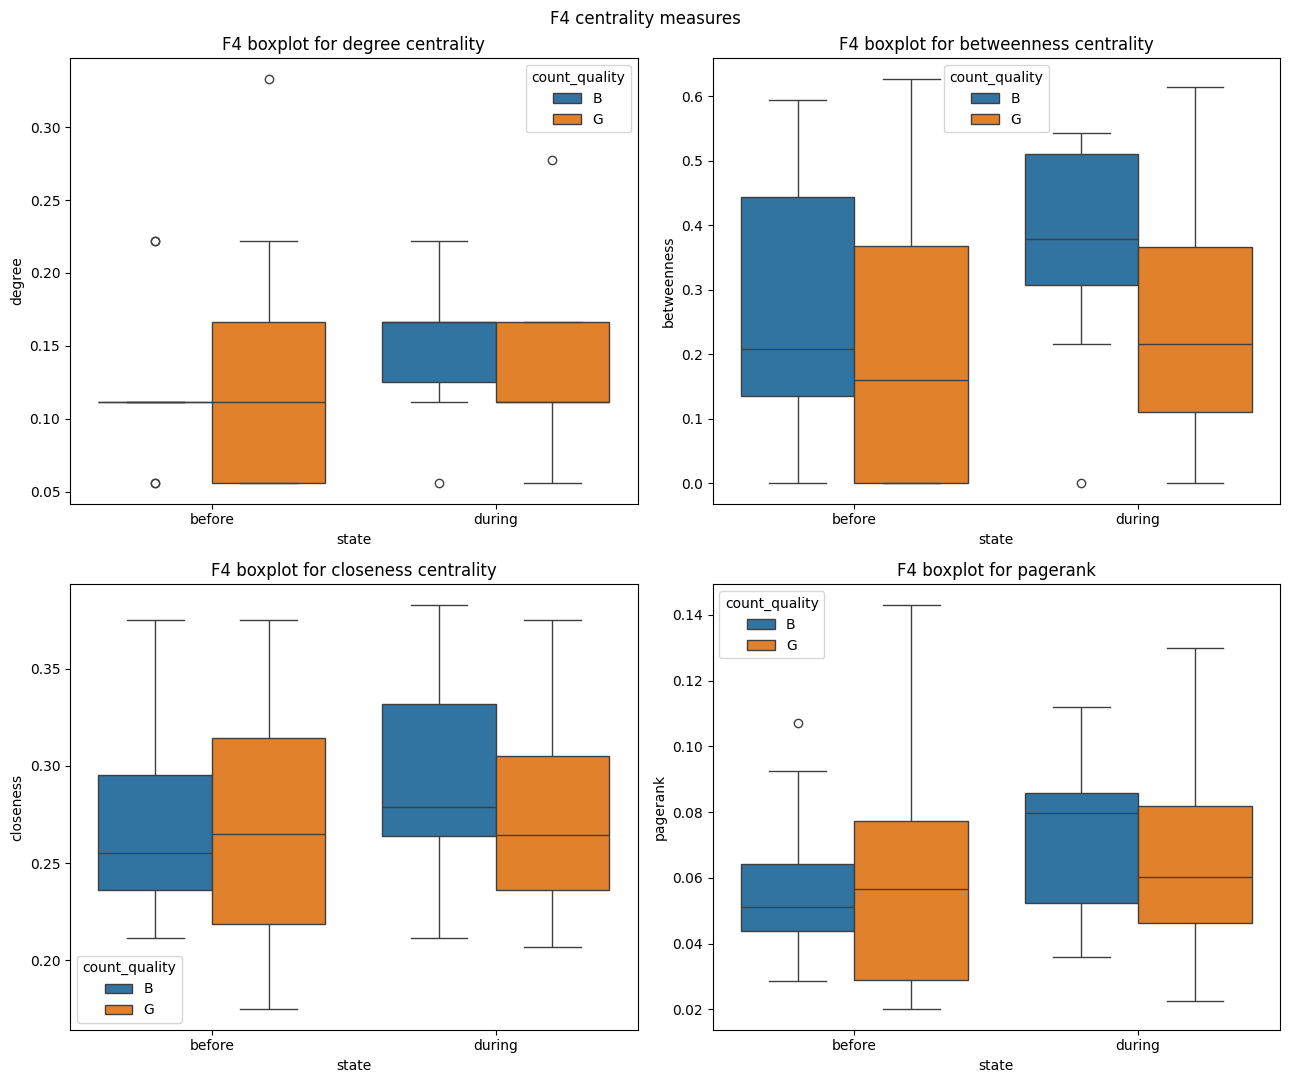

In [7]:
boxplots('F4')

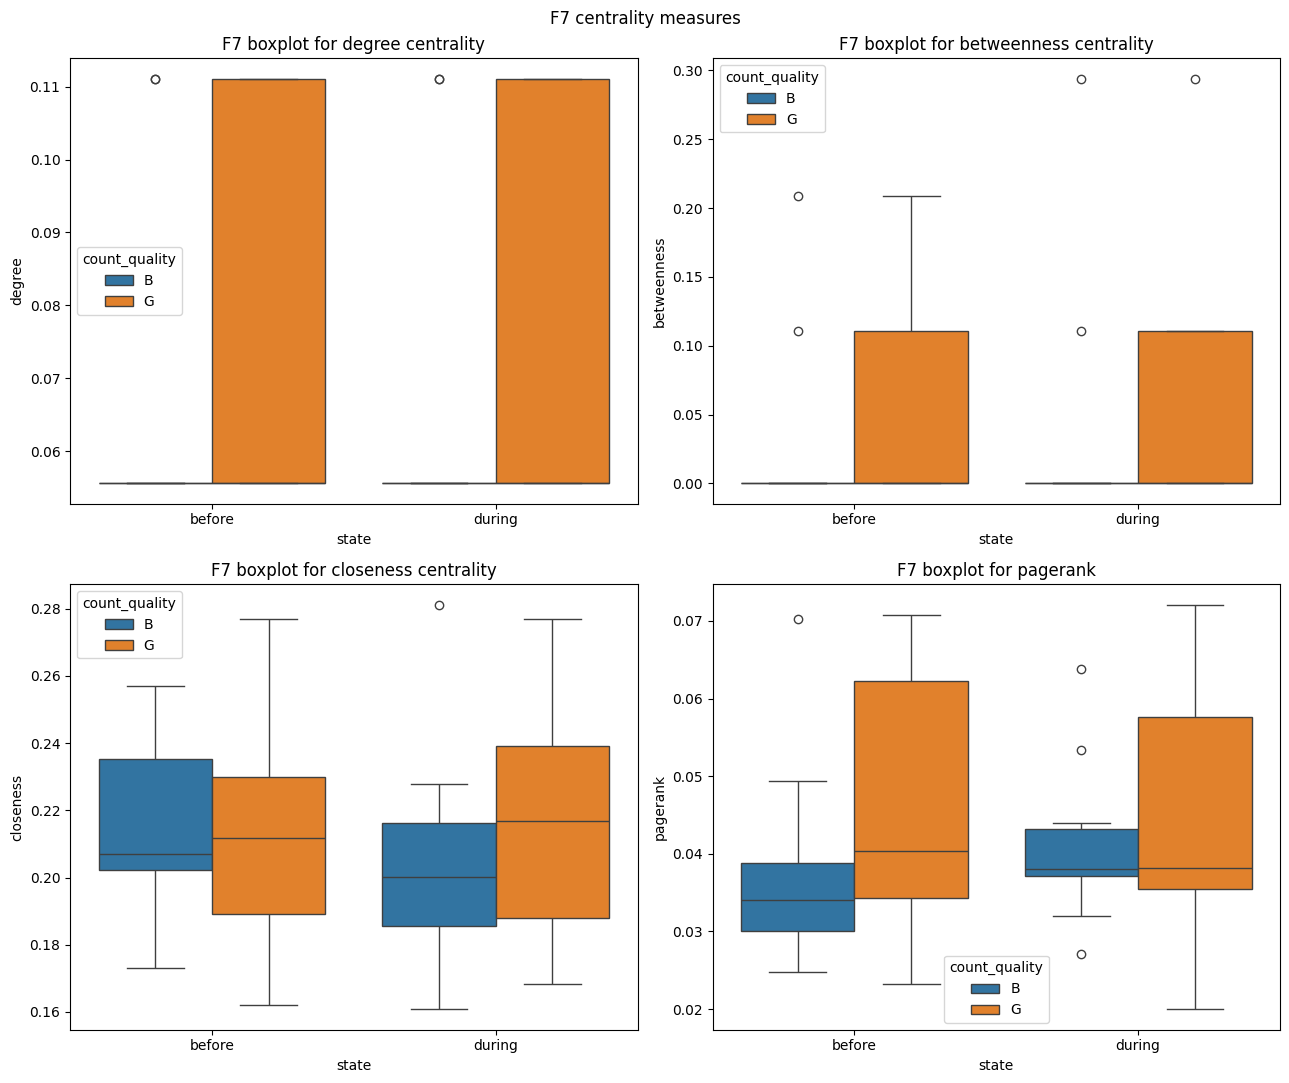

In [8]:
boxplots('F7')

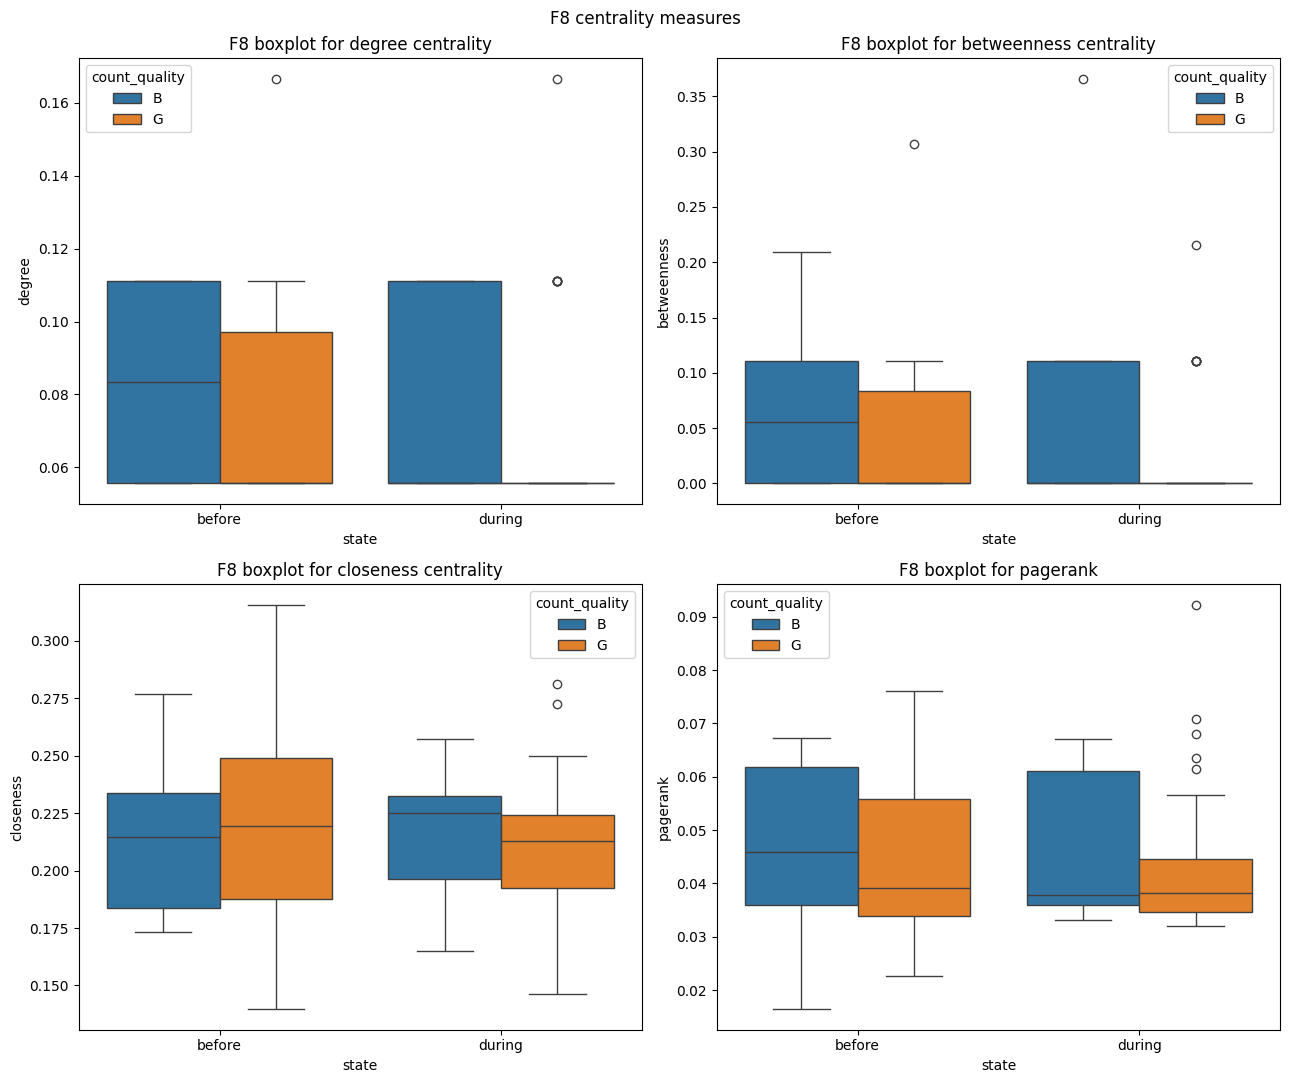

In [9]:
boxplots('F8')

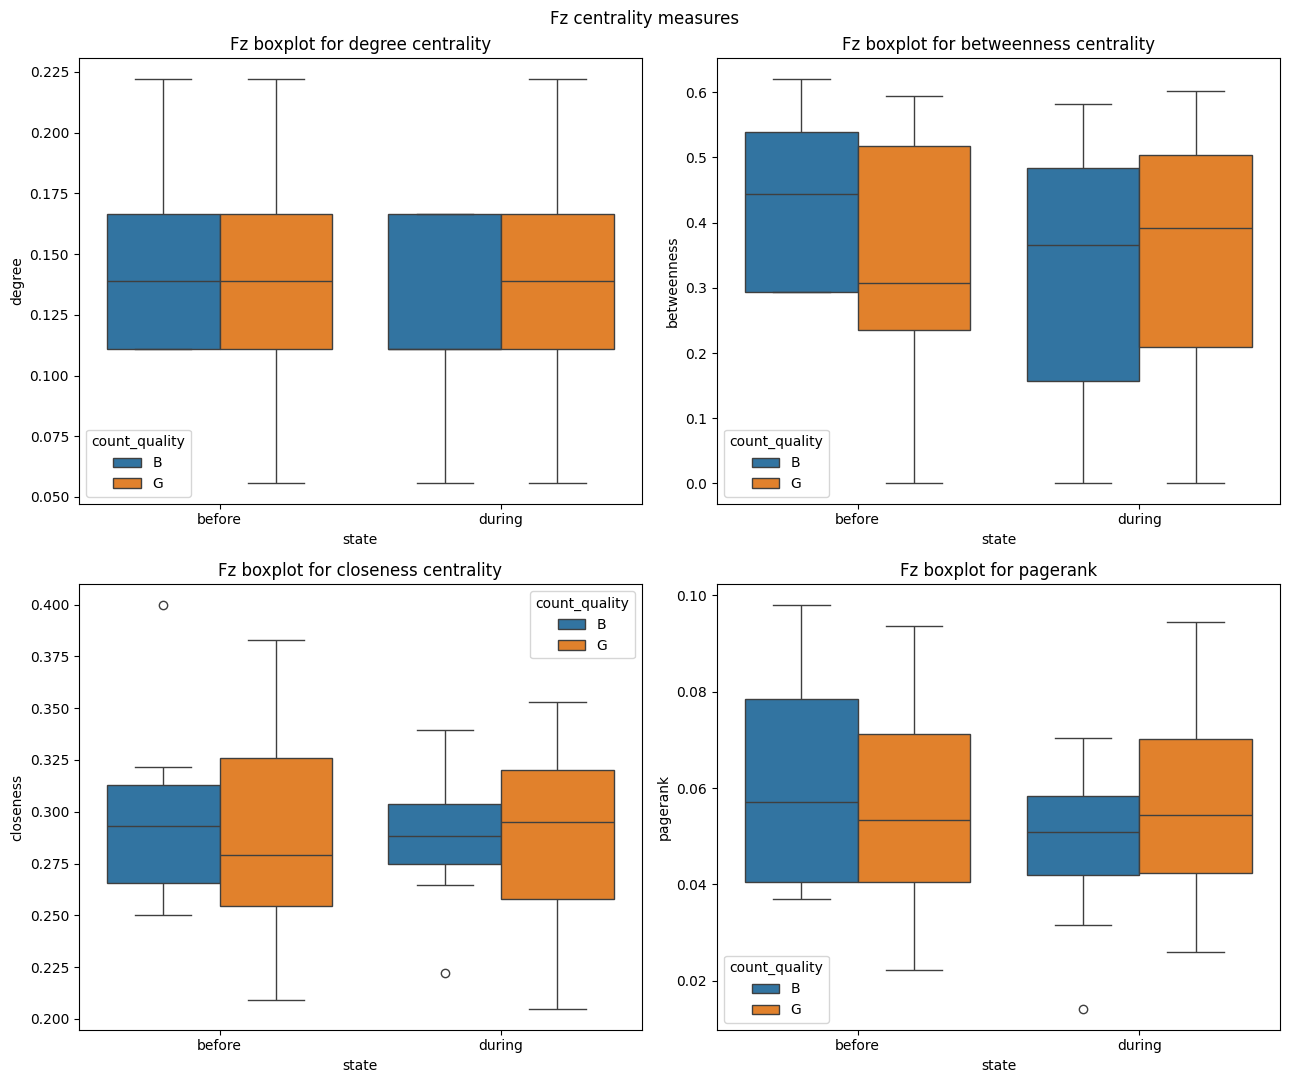

In [10]:
boxplots('Fz')

## Temporal (T)

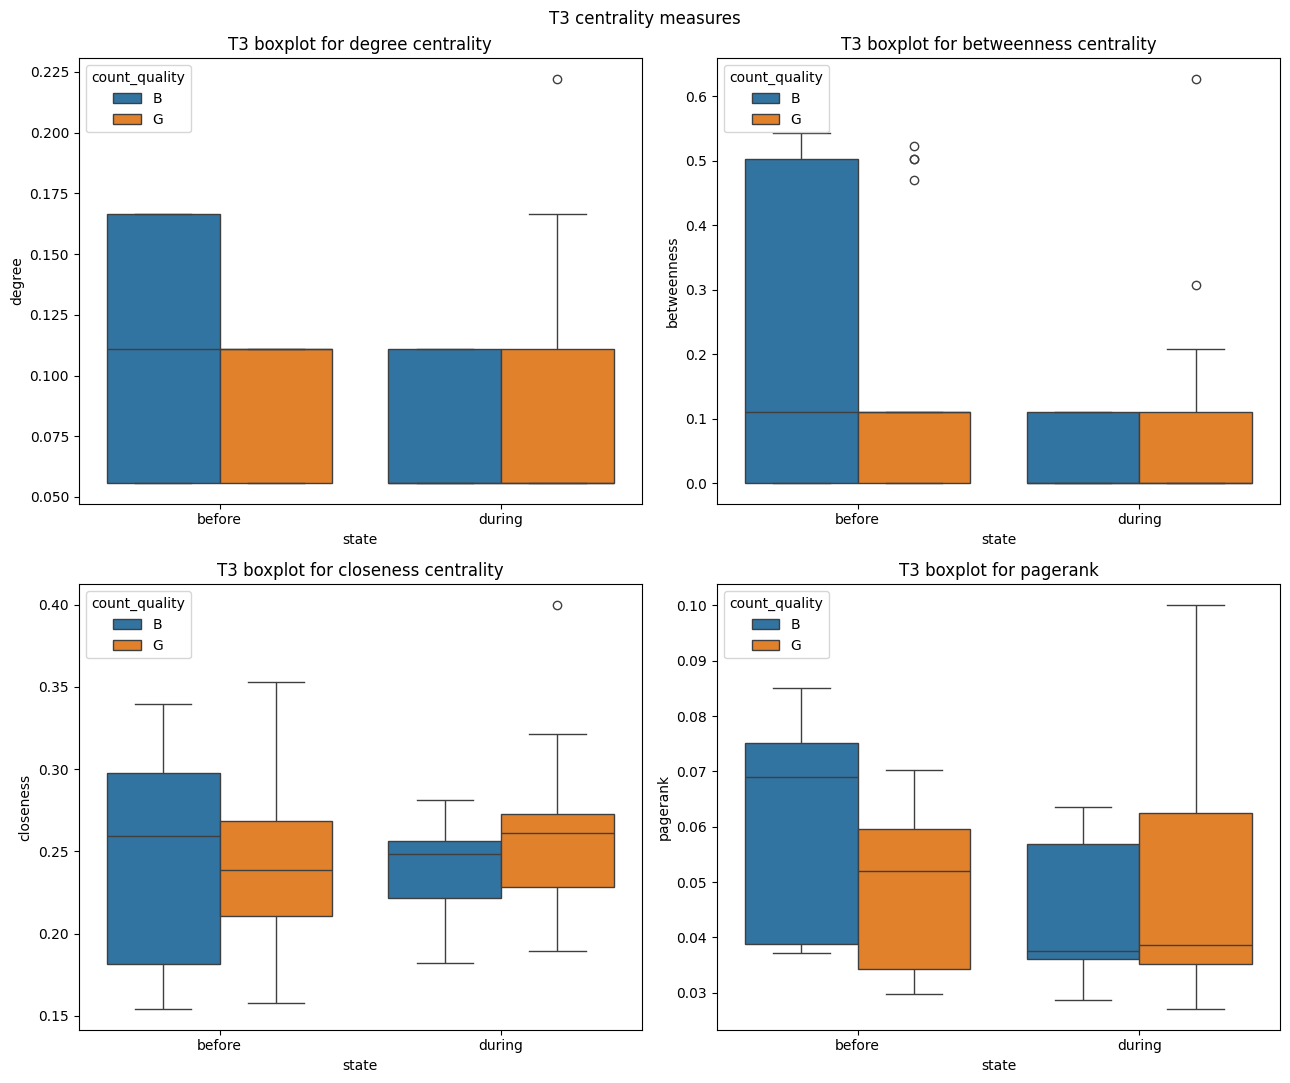

In [11]:
boxplots('T3')

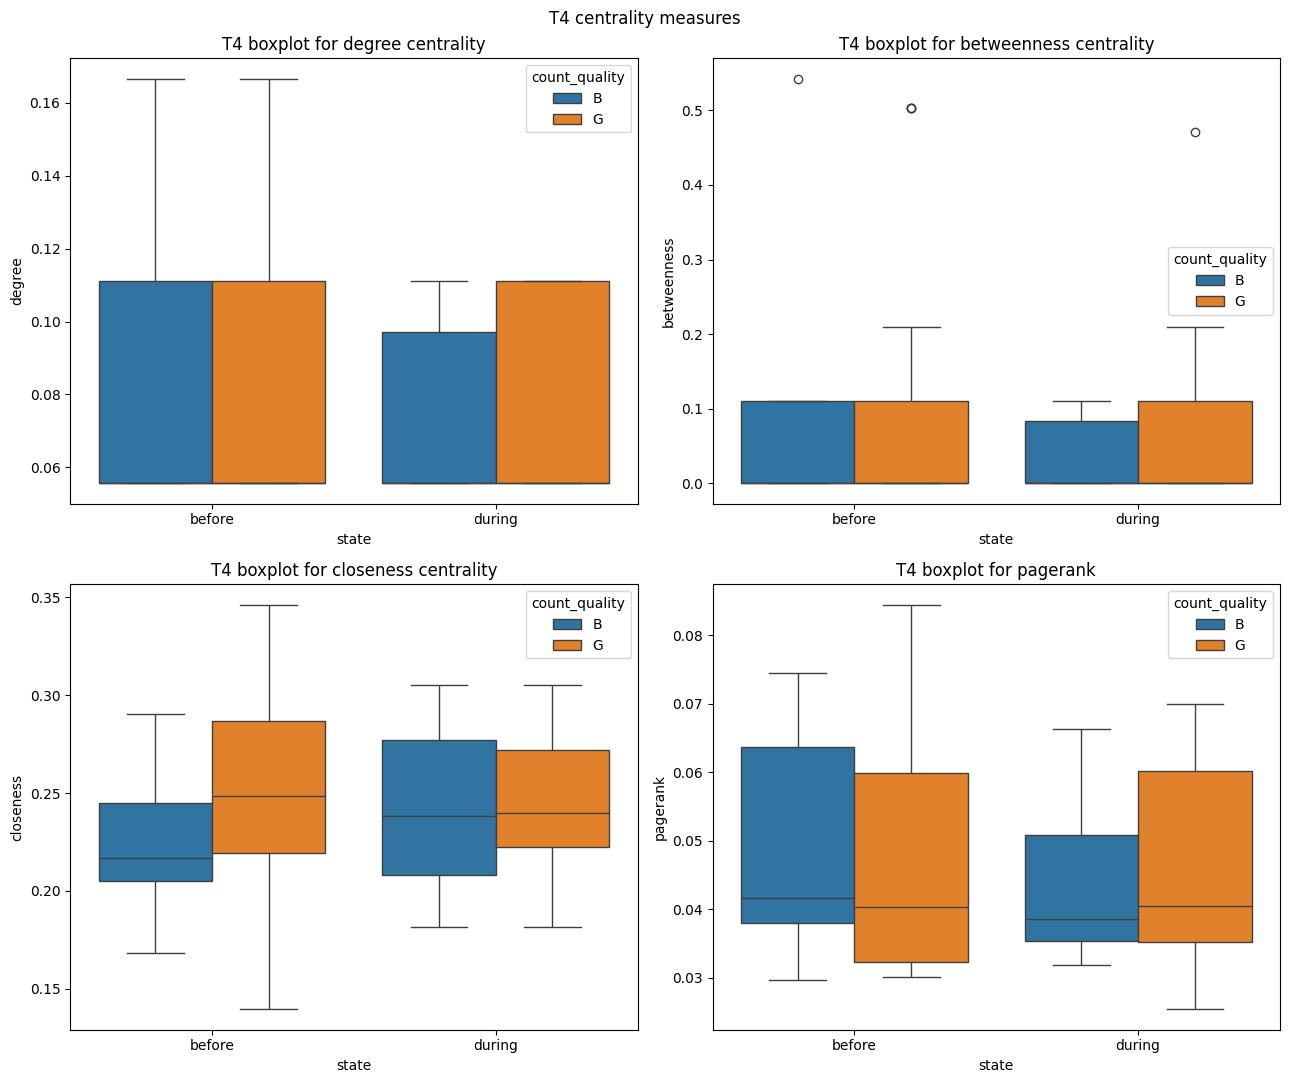

In [12]:
boxplots('T4')

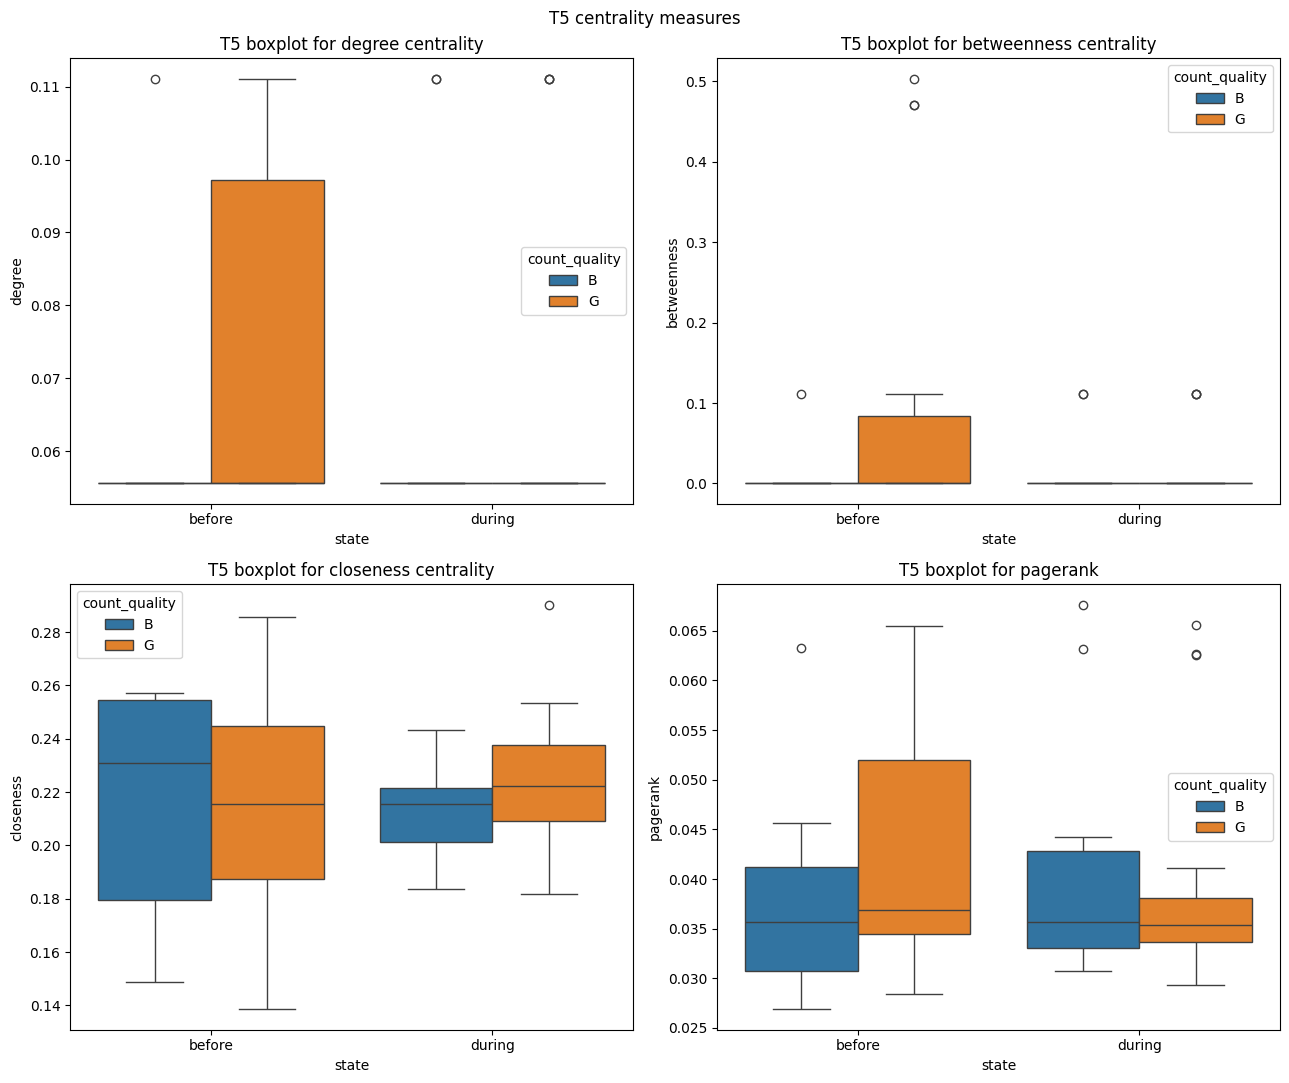

In [13]:
boxplots('T5')

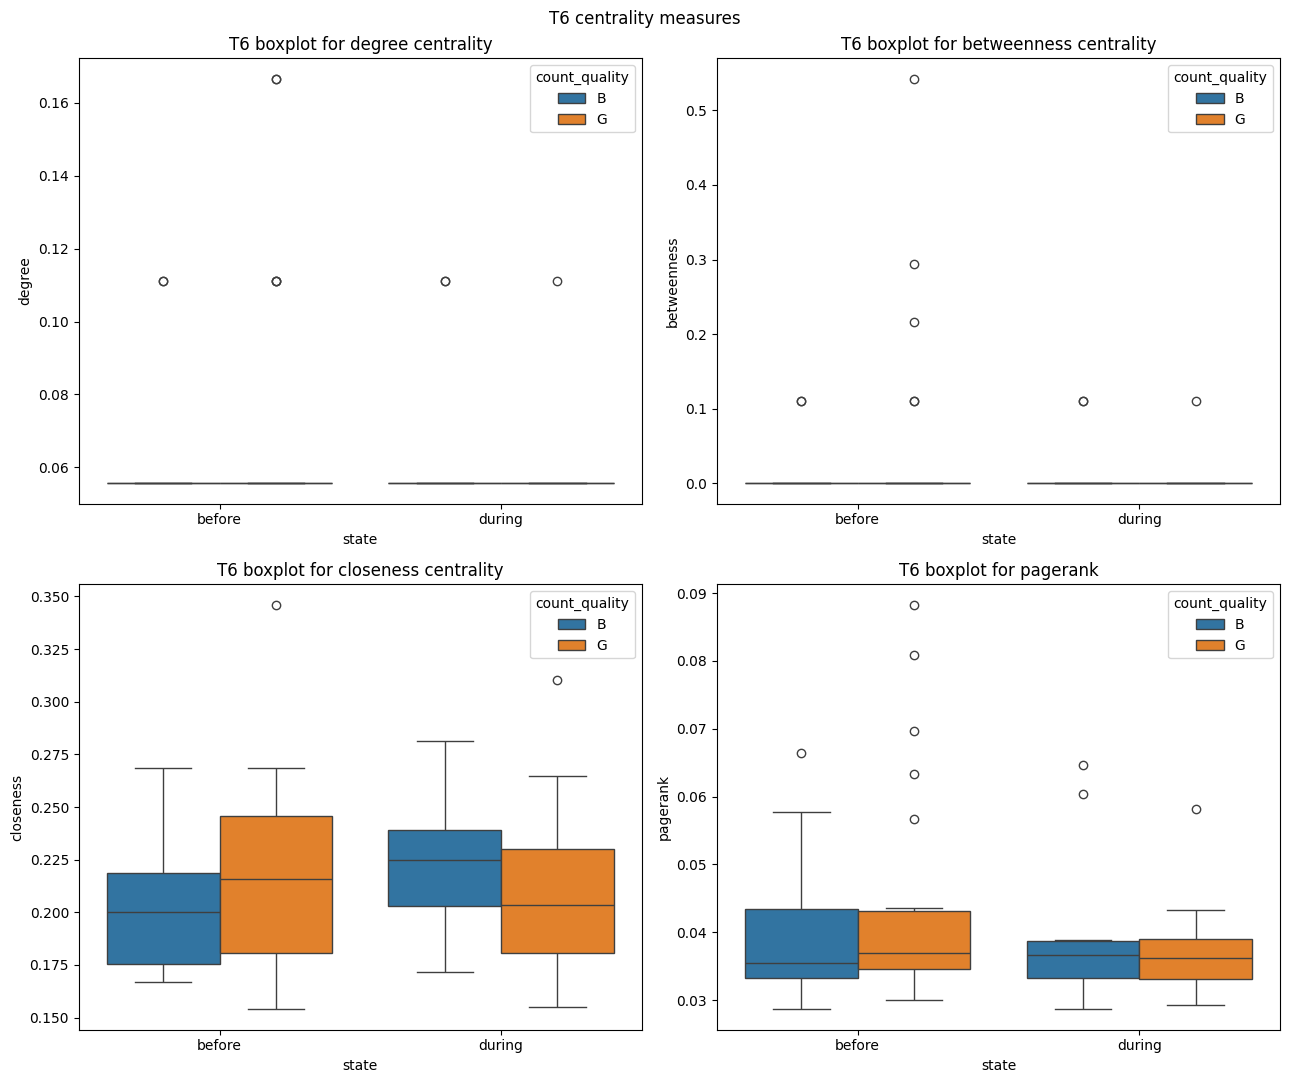

In [14]:
boxplots('T6')

## Central (C)

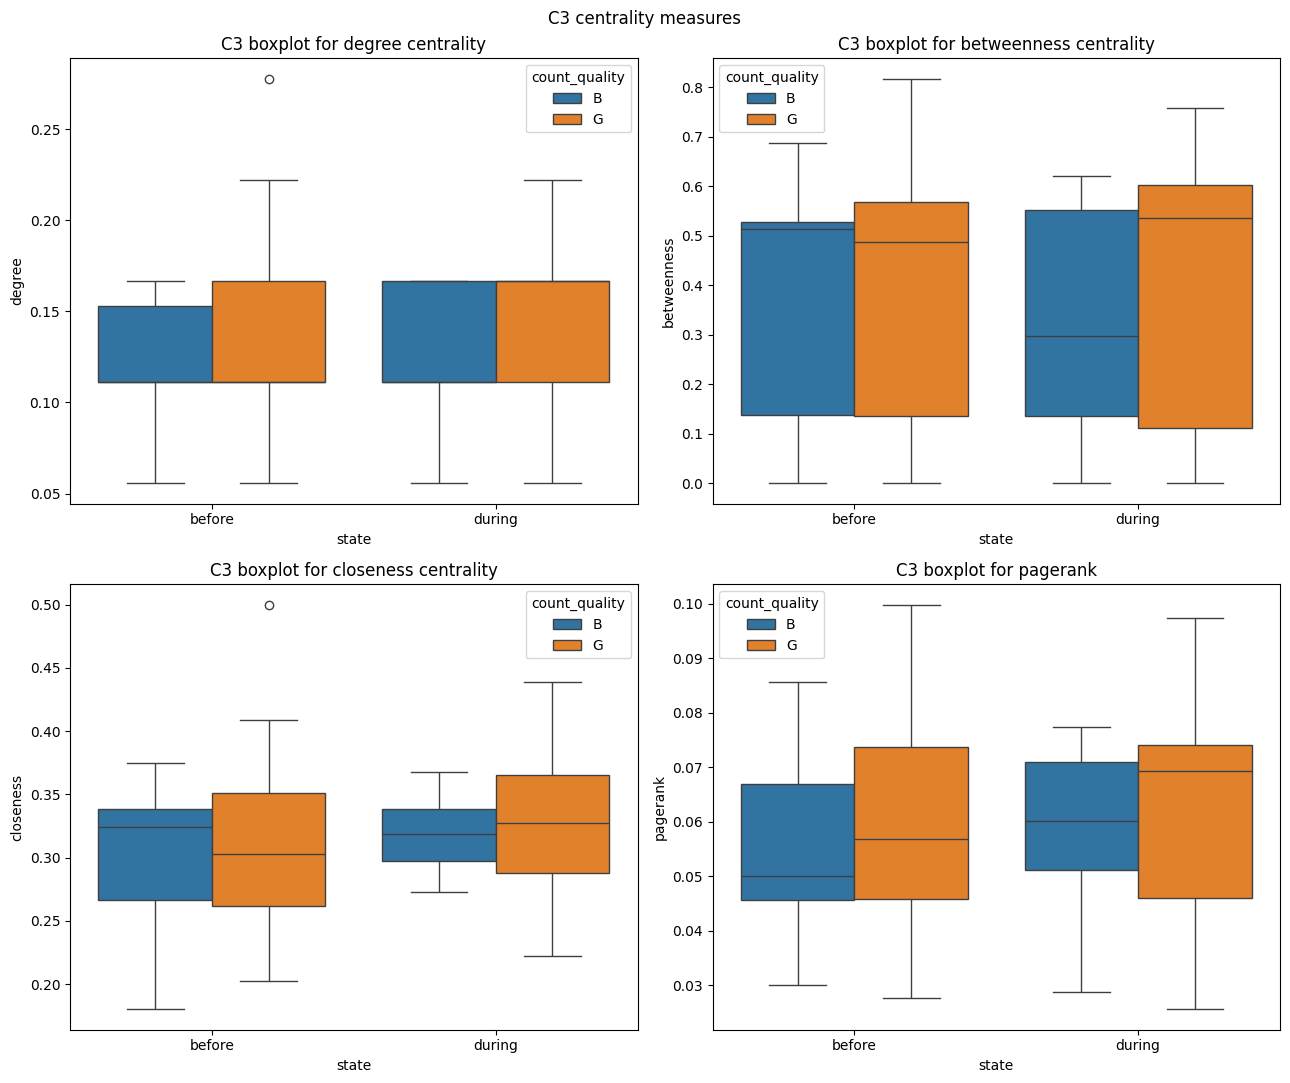

In [15]:
boxplots('C3')

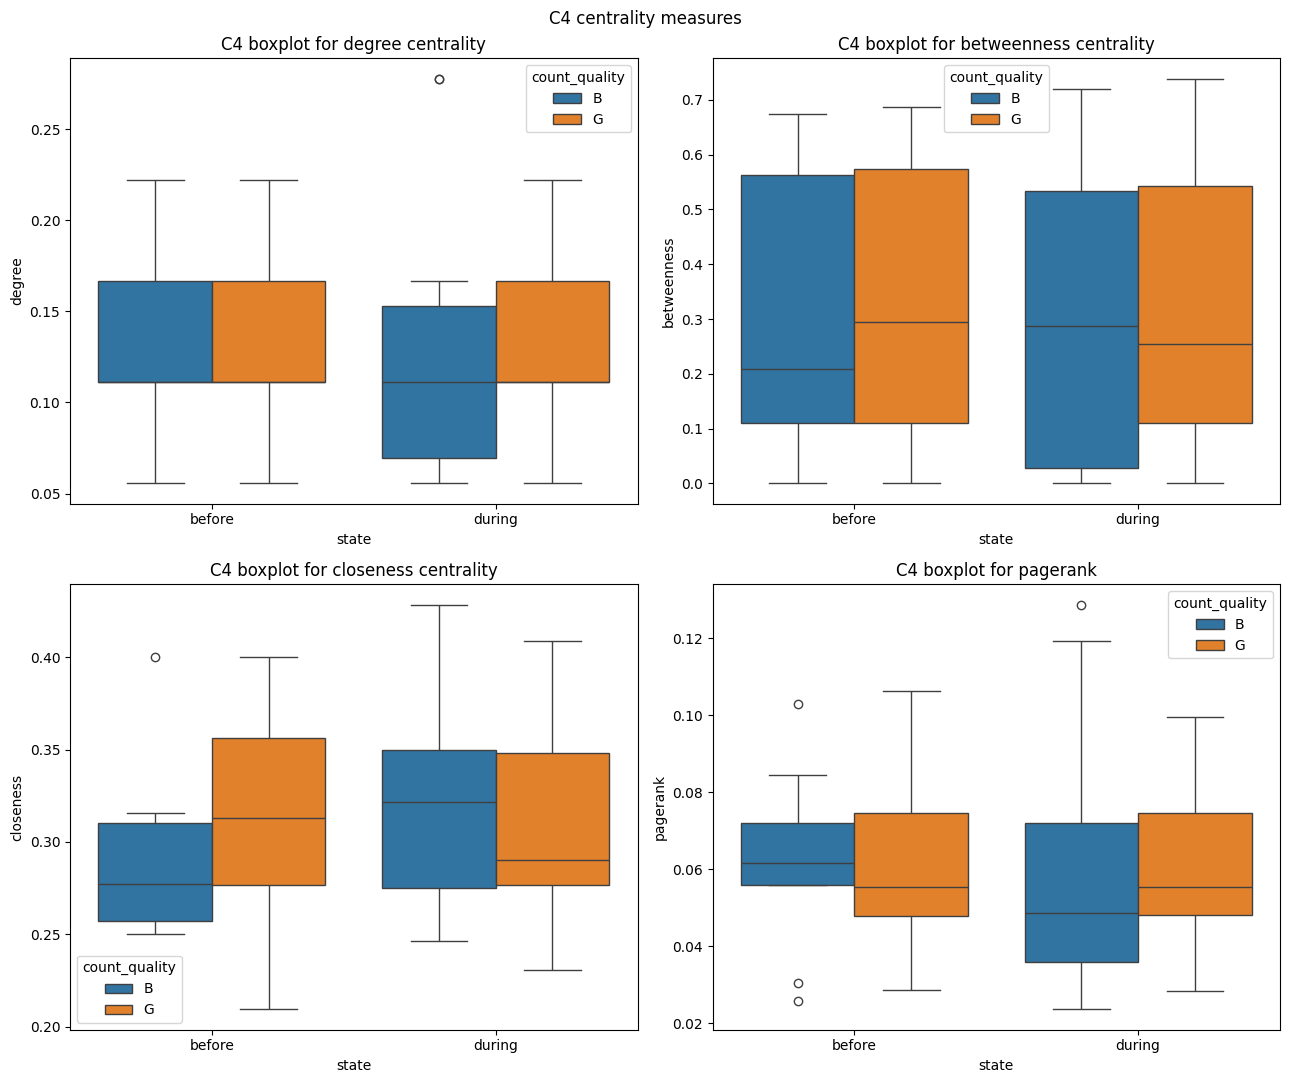

In [16]:
boxplots('C4')

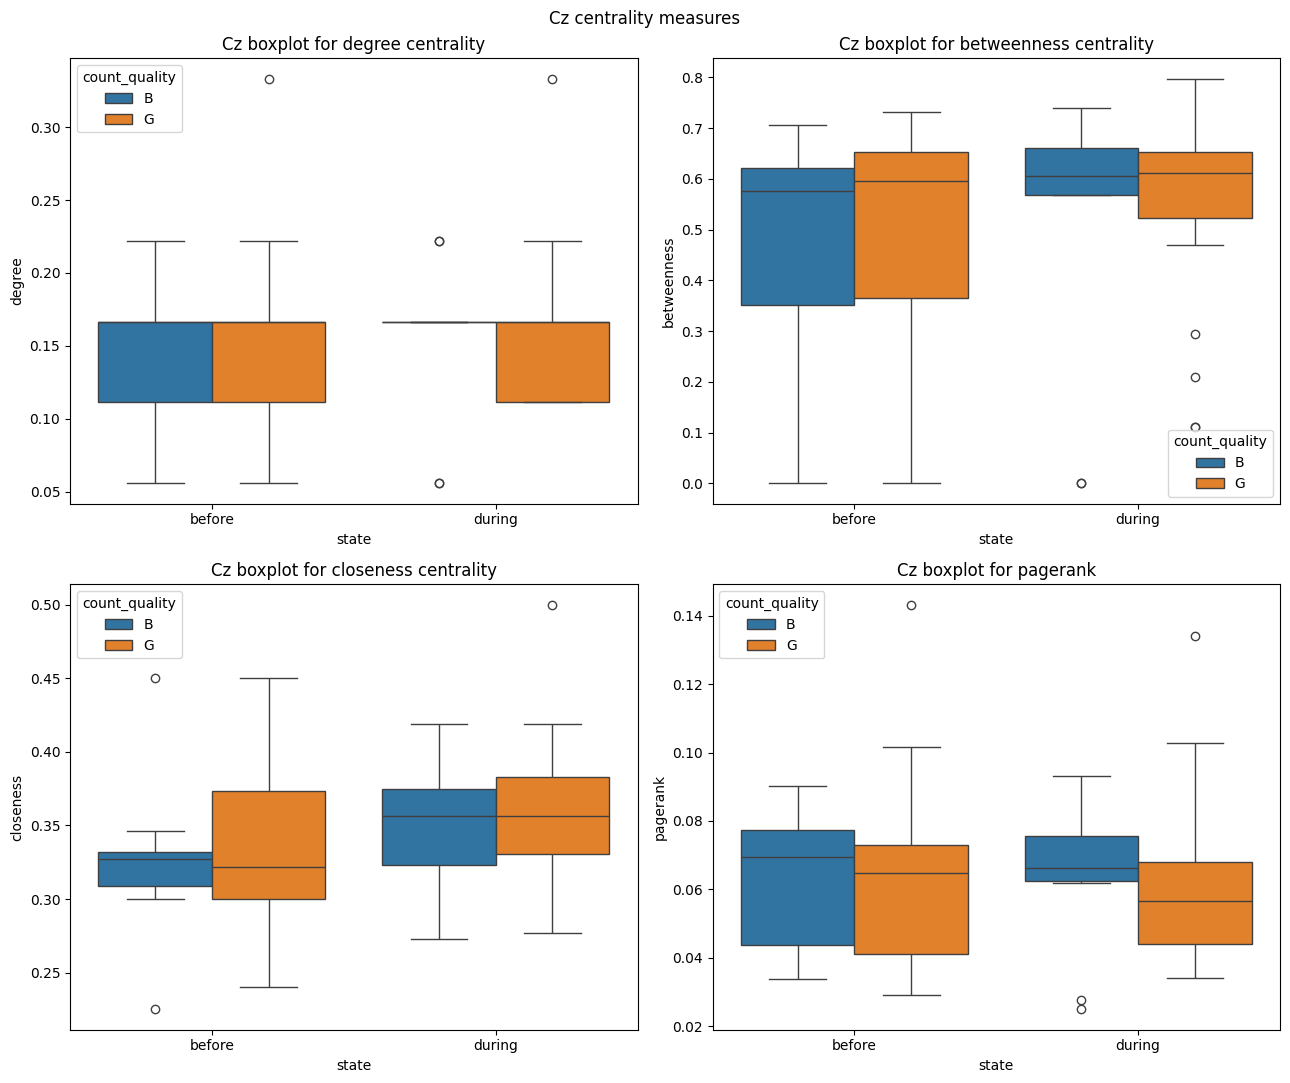

In [17]:
boxplots('Cz')

## Parietal

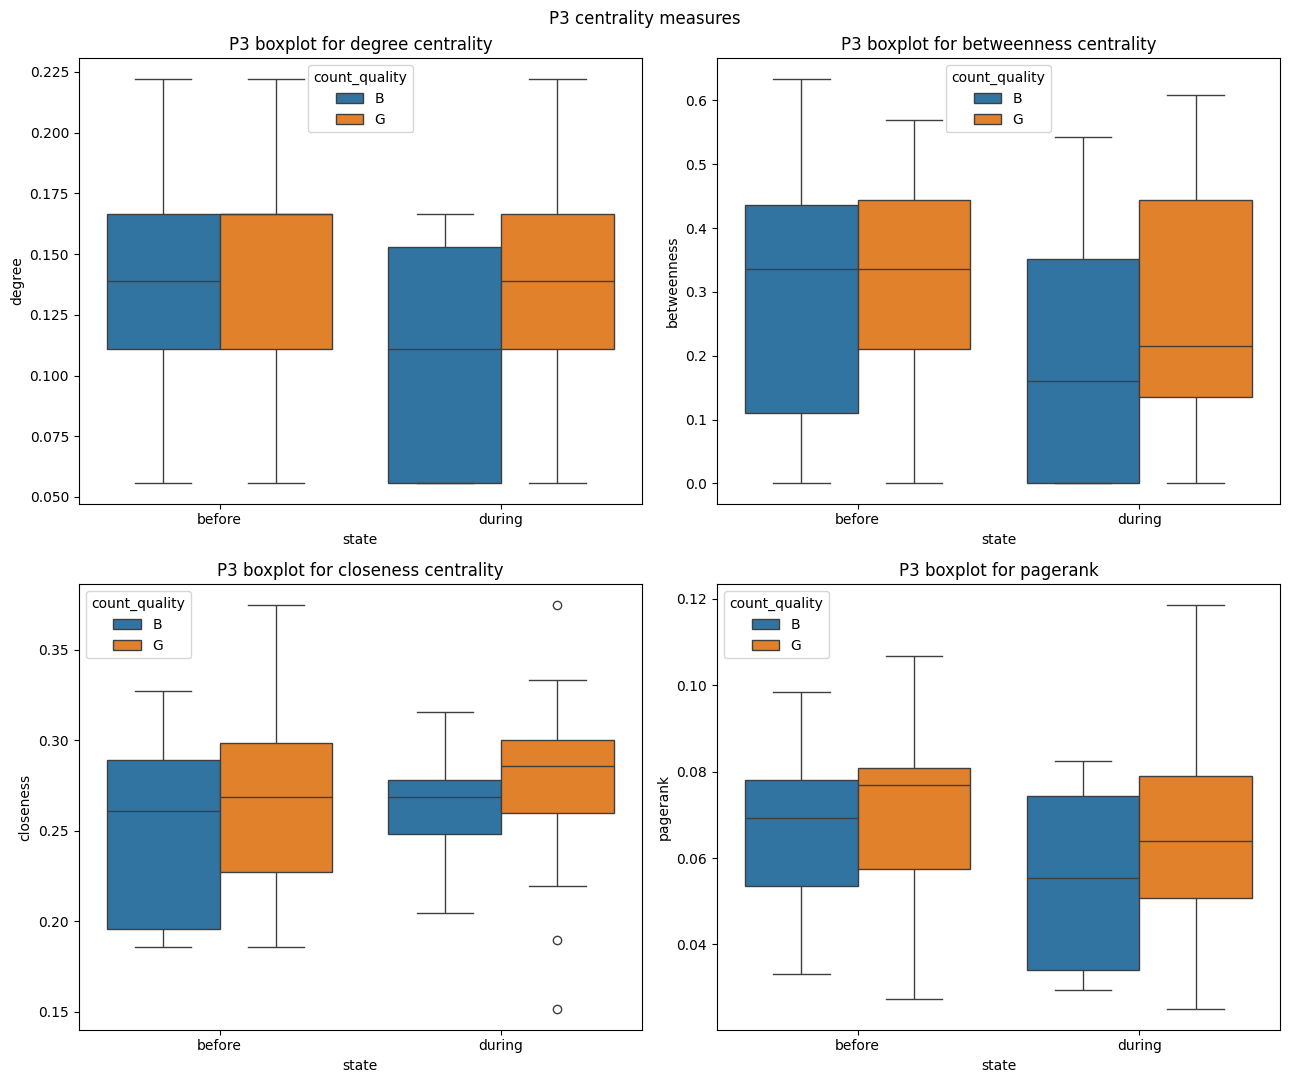

In [18]:
boxplots('P3')

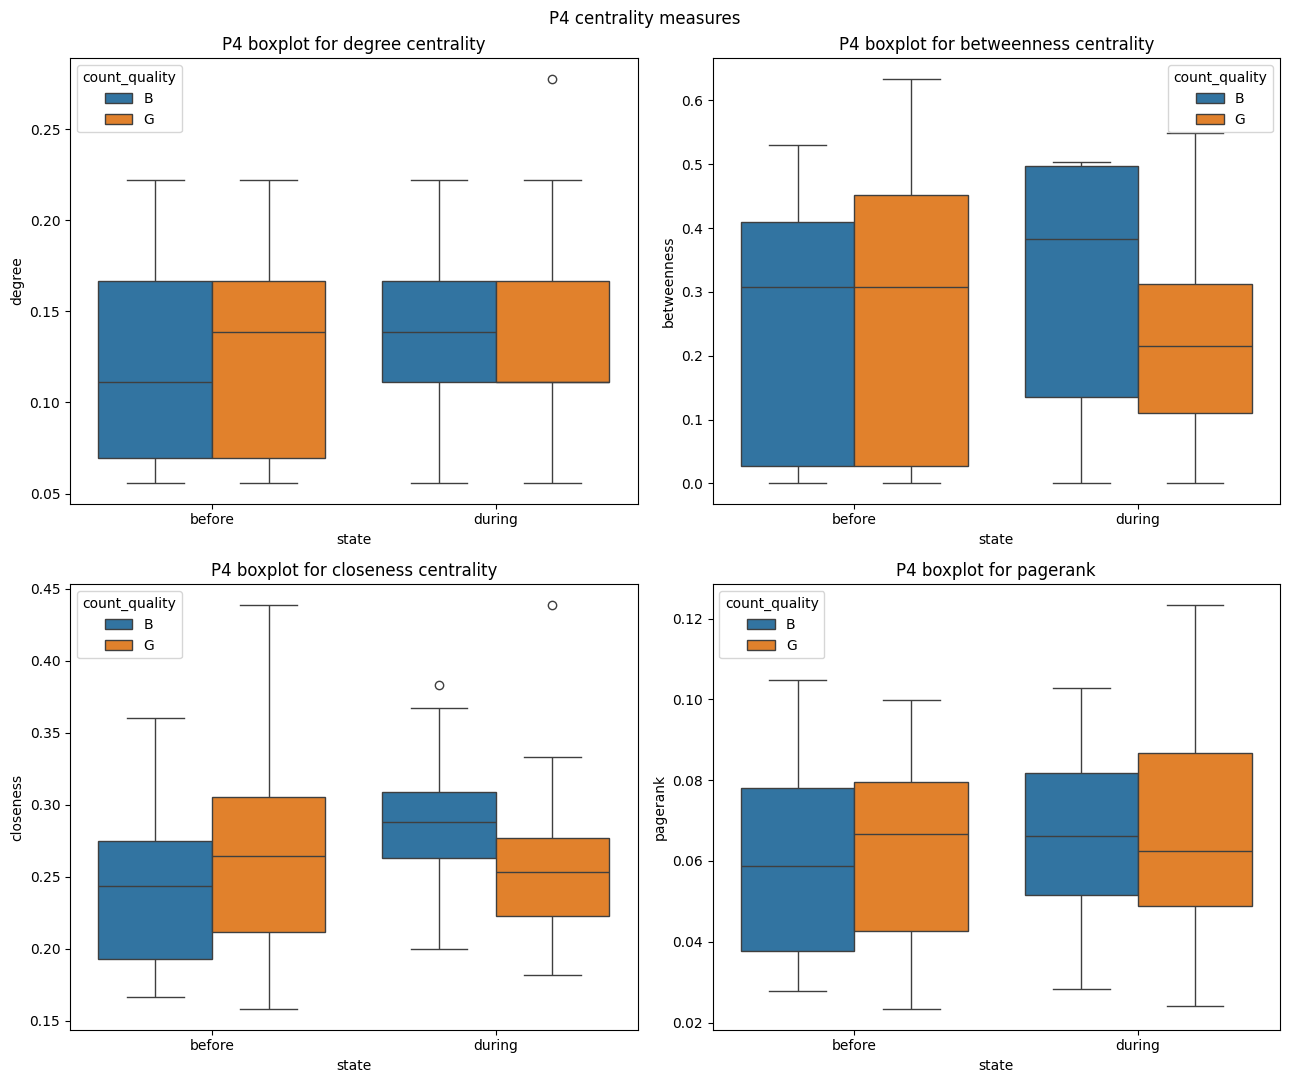

In [19]:
boxplots('P4')

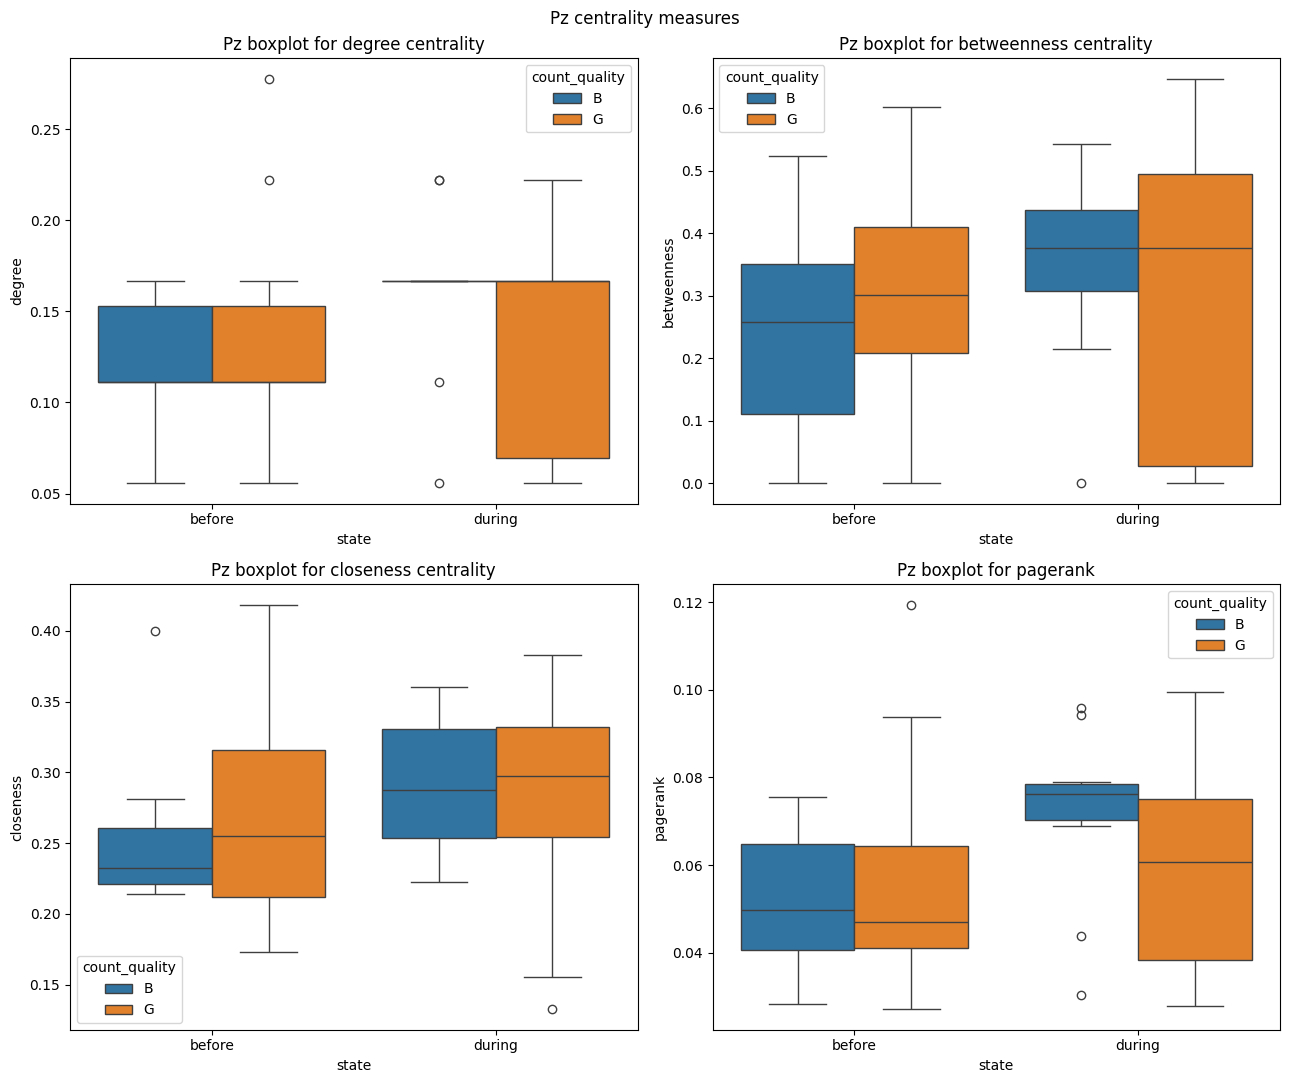

In [20]:
boxplots('Pz')

## Occipital

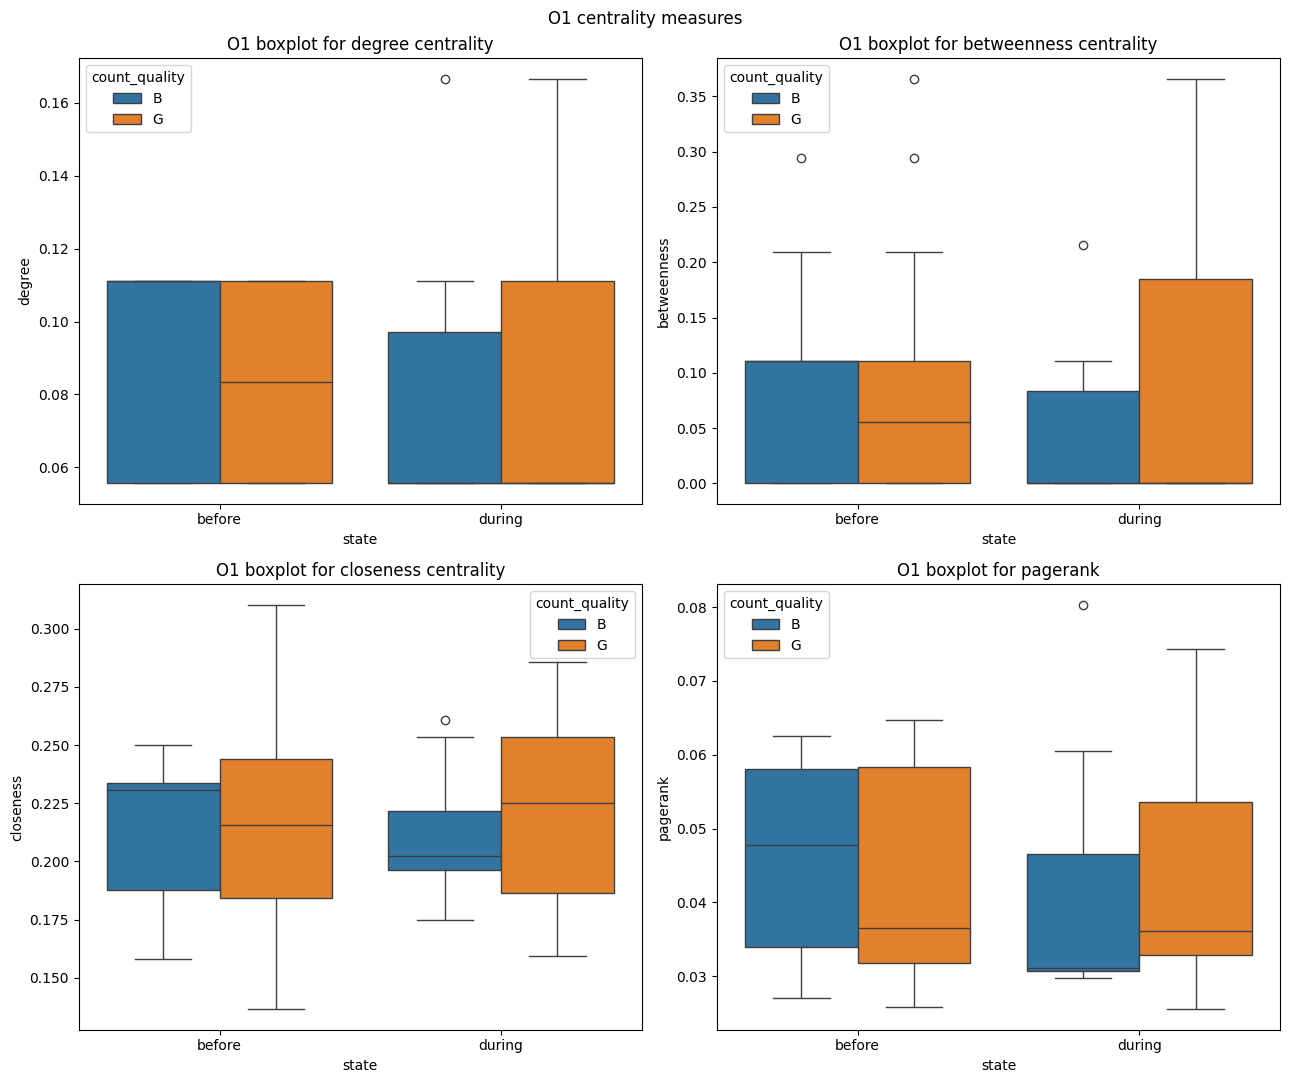

In [21]:
boxplots('O1')

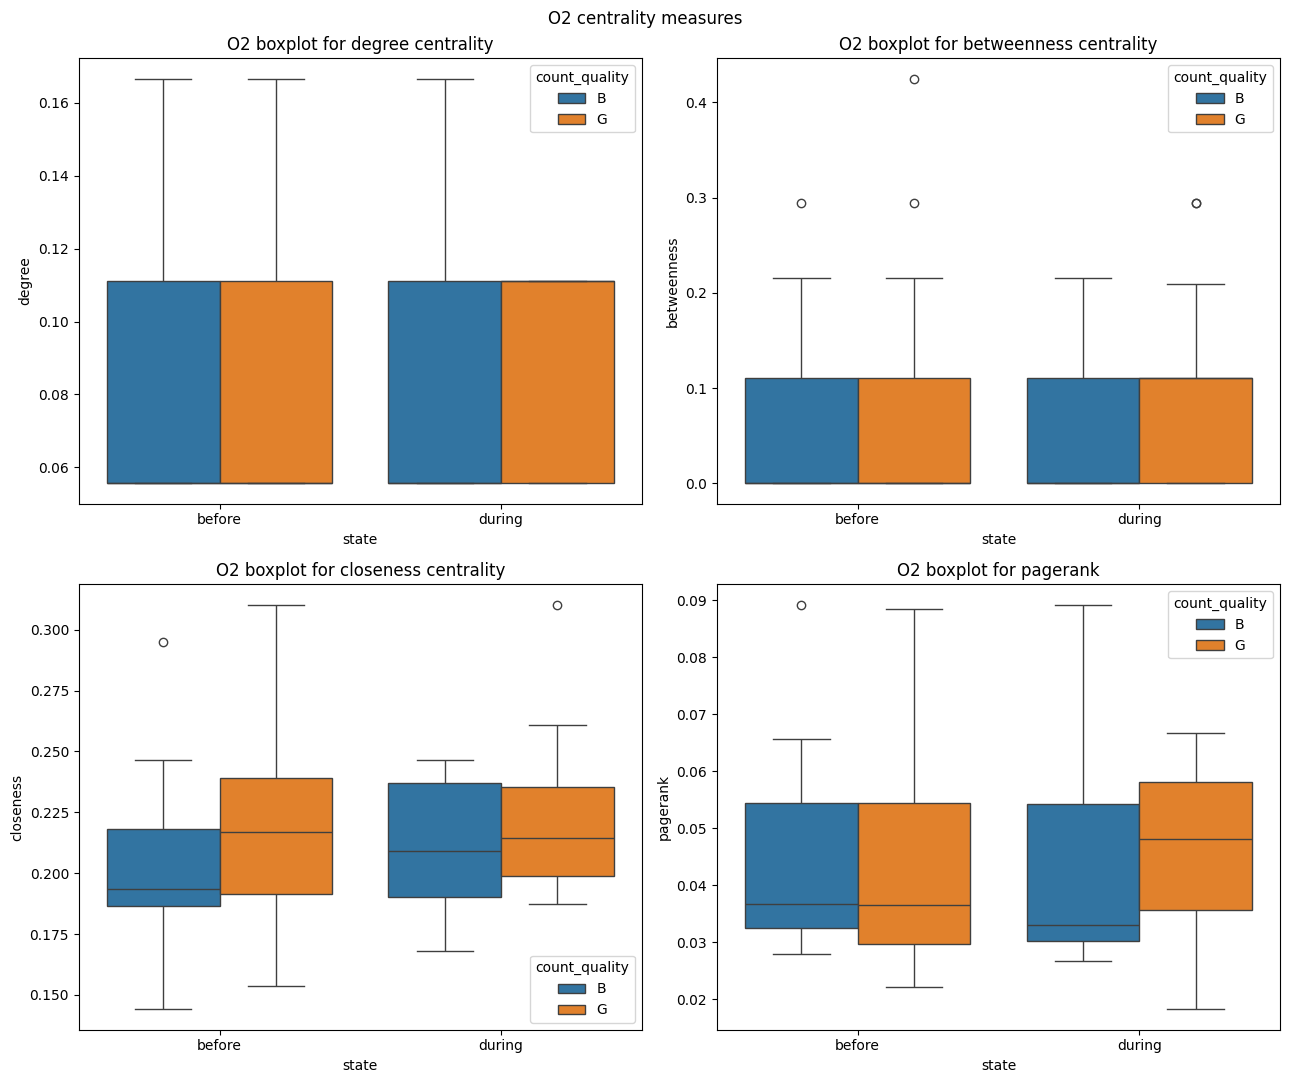

In [22]:
boxplots('O2')

## Resto de Boxplots

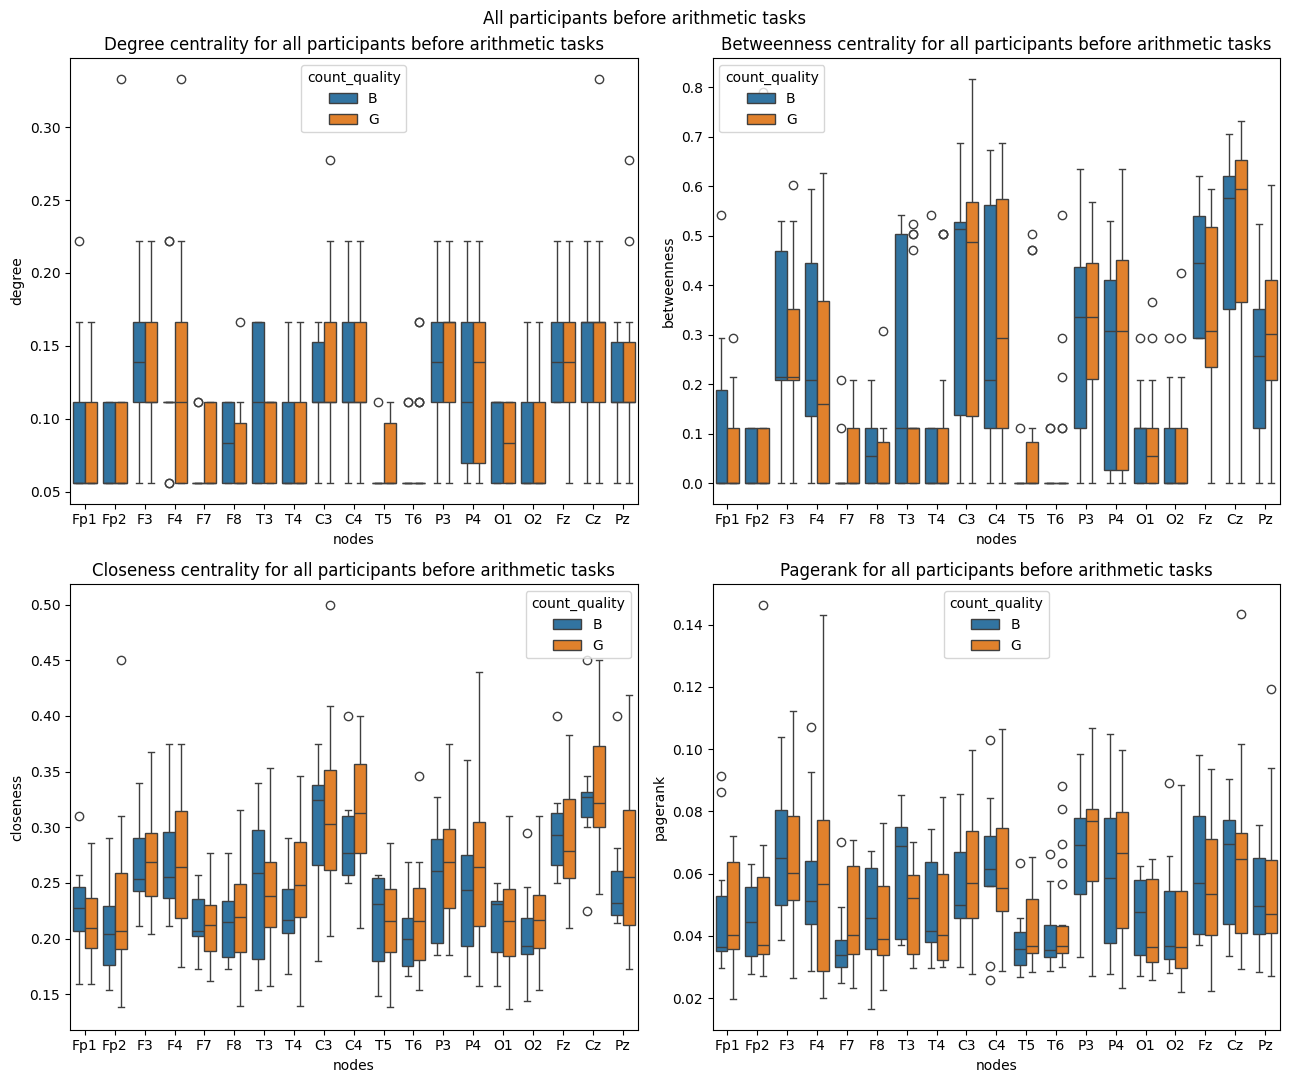

In [23]:
# Todos los nodos de los participantes antes

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13, 11))
fig.suptitle('All participants before arithmetic tasks')

ax1.set_title('Degree centrality for all participants before arithmetic tasks')
sns.boxplot(
    df_before, x='nodes', y='degree', hue='count_quality', ax=ax1
)

ax2.set_title('Betweenness centrality for all participants before arithmetic tasks')
sns.boxplot(
    df_before, x='nodes', y='betweenness', hue='count_quality', ax=ax2
)

ax3.set_title('Closeness centrality for all participants before arithmetic tasks')
sns.boxplot(
    df_before, x='nodes', y='closeness', hue='count_quality', ax=ax3
)

ax4.set_title('Pagerank for all participants before arithmetic tasks')
sns.boxplot(
    df_before, x='nodes', y='pagerank', hue='count_quality', ax=ax4
)

plt.tight_layout()

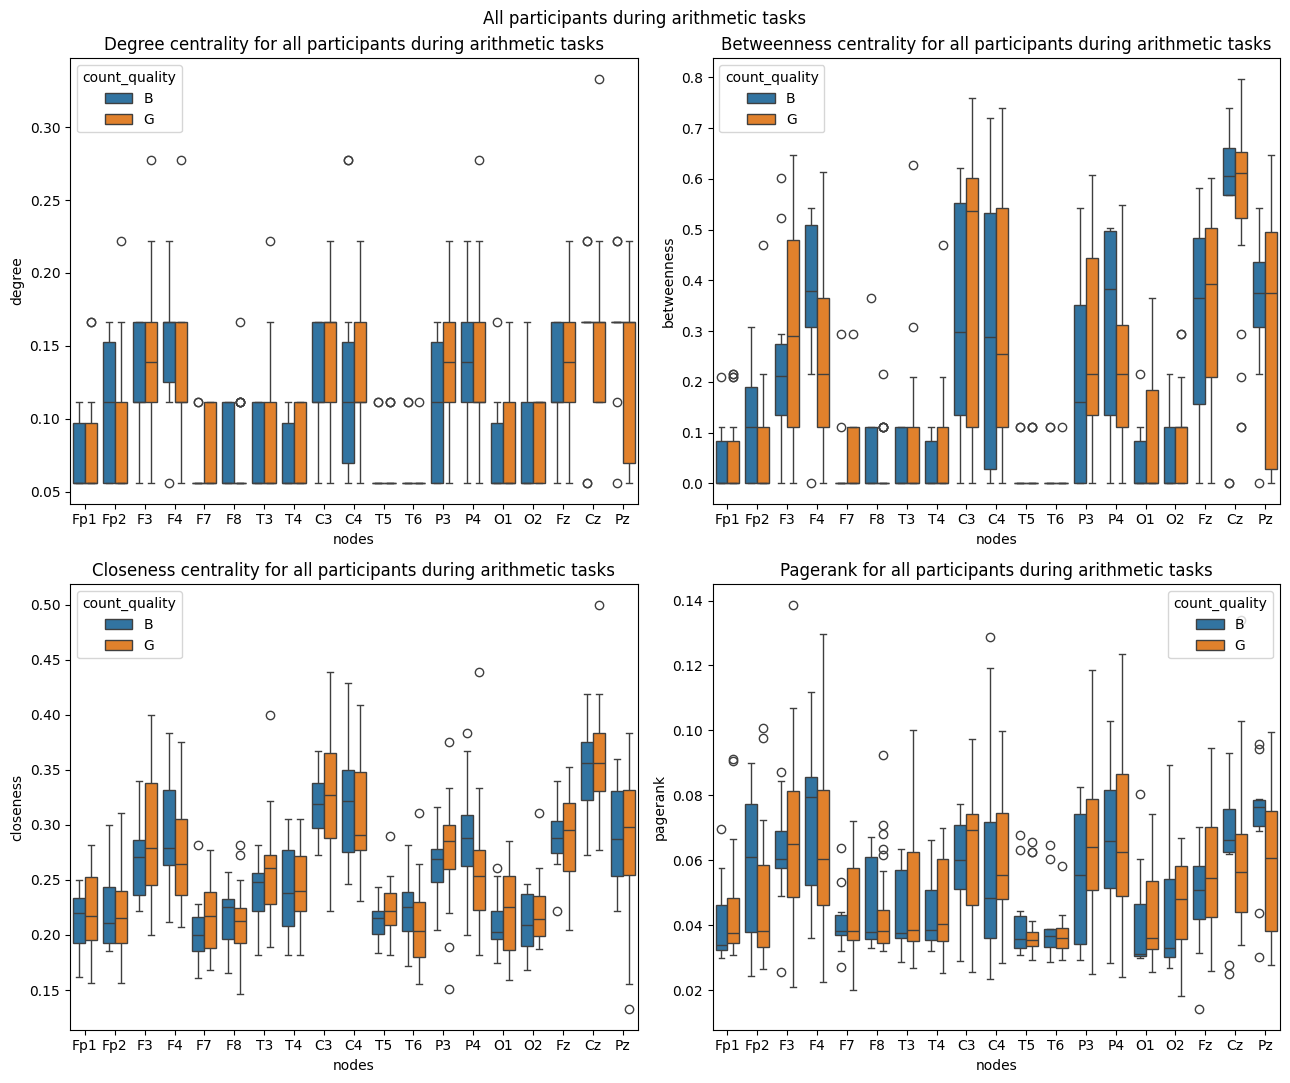

In [24]:
# Todos los nodos de los participantes durante

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13, 11))
fig.suptitle('All participants during arithmetic tasks')

ax1.set_title('Degree centrality for all participants during arithmetic tasks')
sns.boxplot(
    df_during, x='nodes', y='degree', hue='count_quality', ax=ax1
)

ax2.set_title('Betweenness centrality for all participants during arithmetic tasks')
sns.boxplot(
    df_during, x='nodes', y='betweenness', hue='count_quality', ax=ax2
)

ax3.set_title('Closeness centrality for all participants during arithmetic tasks')
sns.boxplot(
    df_during, x='nodes', y='closeness', hue='count_quality', ax=ax3
)

ax4.set_title('Pagerank for all participants during arithmetic tasks')
sns.boxplot(
    df_during, x='nodes', y='pagerank', hue='count_quality', ax=ax4
)

plt.tight_layout()